In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression

In [3]:
estimate_from_mobile_data = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data.npy')
estimate_month7_Geo = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_month7_Geo.npy')

In [4]:
estimate_from_mobile_data_flatten = estimate_from_mobile_data.flatten()
estimate_month7_Geo_flatten = estimate_month7_Geo.flatten()

In [5]:
estimate_from_mobile_data_asa = estimate_from_mobile_data[:,0:7]
estimate_from_mobile_data_hiru = estimate_from_mobile_data[:,8:15]
estimate_from_mobile_data_ban = estimate_from_mobile_data[:,16:23]

In [6]:
estimate_month7_Geo_asa = estimate_month7_Geo[:,0:7]
estimate_month7_Geo_hiru = estimate_month7_Geo[:,8:15]
estimate_month7_Geo_ban = estimate_month7_Geo[:,16:23]

In [7]:
estimate_from_mobile_data_asa_flatten = estimate_from_mobile_data_asa.flatten()
estimate_from_mobile_data_hiru_flatten = estimate_from_mobile_data_hiru.flatten()
estimate_from_mobile_data_ban_flatten = estimate_from_mobile_data_ban.flatten()

In [8]:
estimate_month7_Geo_asa_flatten = estimate_month7_Geo_asa.flatten()
estimate_month7_Geo_hiru_flatten = estimate_month7_Geo_hiru.flatten()
estimate_month7_Geo_ban_flatten = estimate_month7_Geo_ban.flatten()

/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


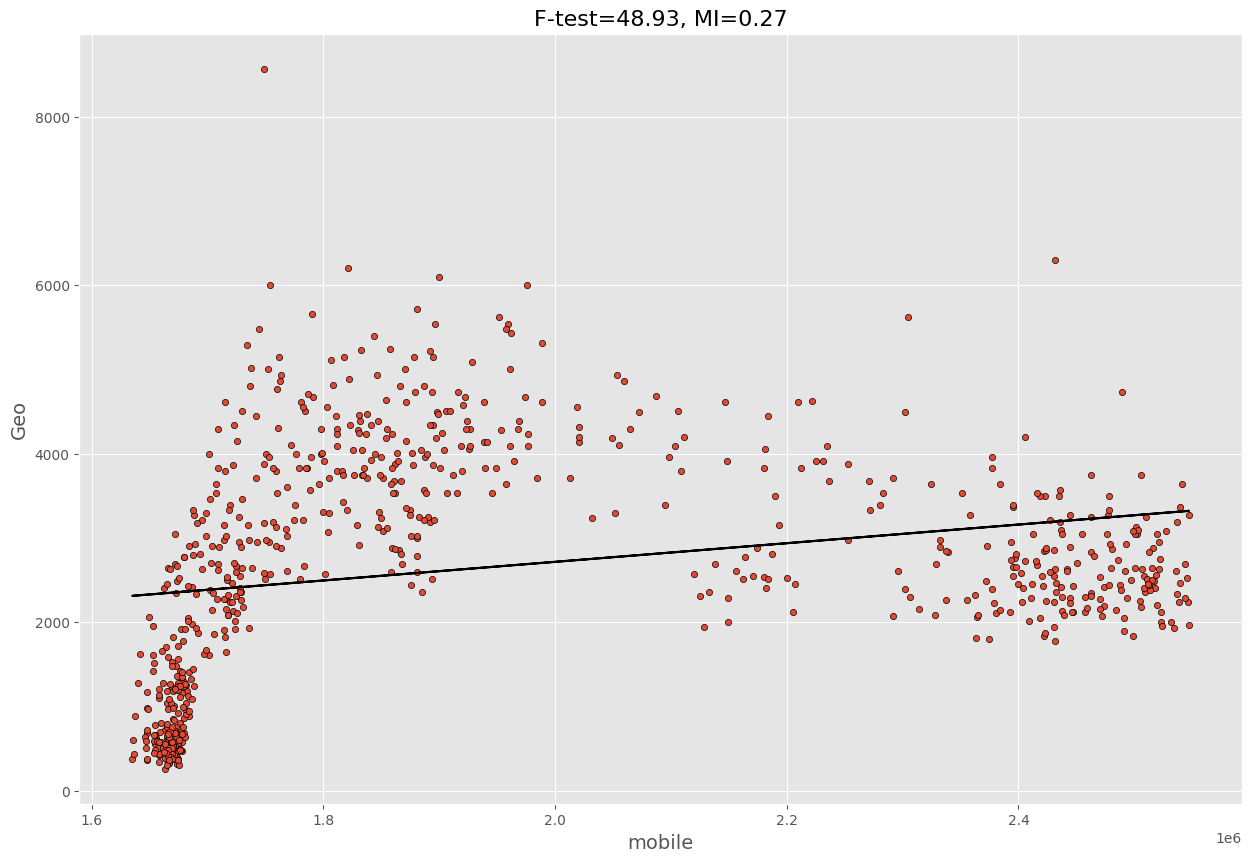

In [9]:
X = estimate_from_mobile_data_flatten.reshape(-1,1)
y = estimate_month7_Geo_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
y2 = a * X + b
plt.plot(X, y2,color='black')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.scatter(X[:, 0], y, edgecolor="black", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validatio

Text(0, 0.5, 'Geo')

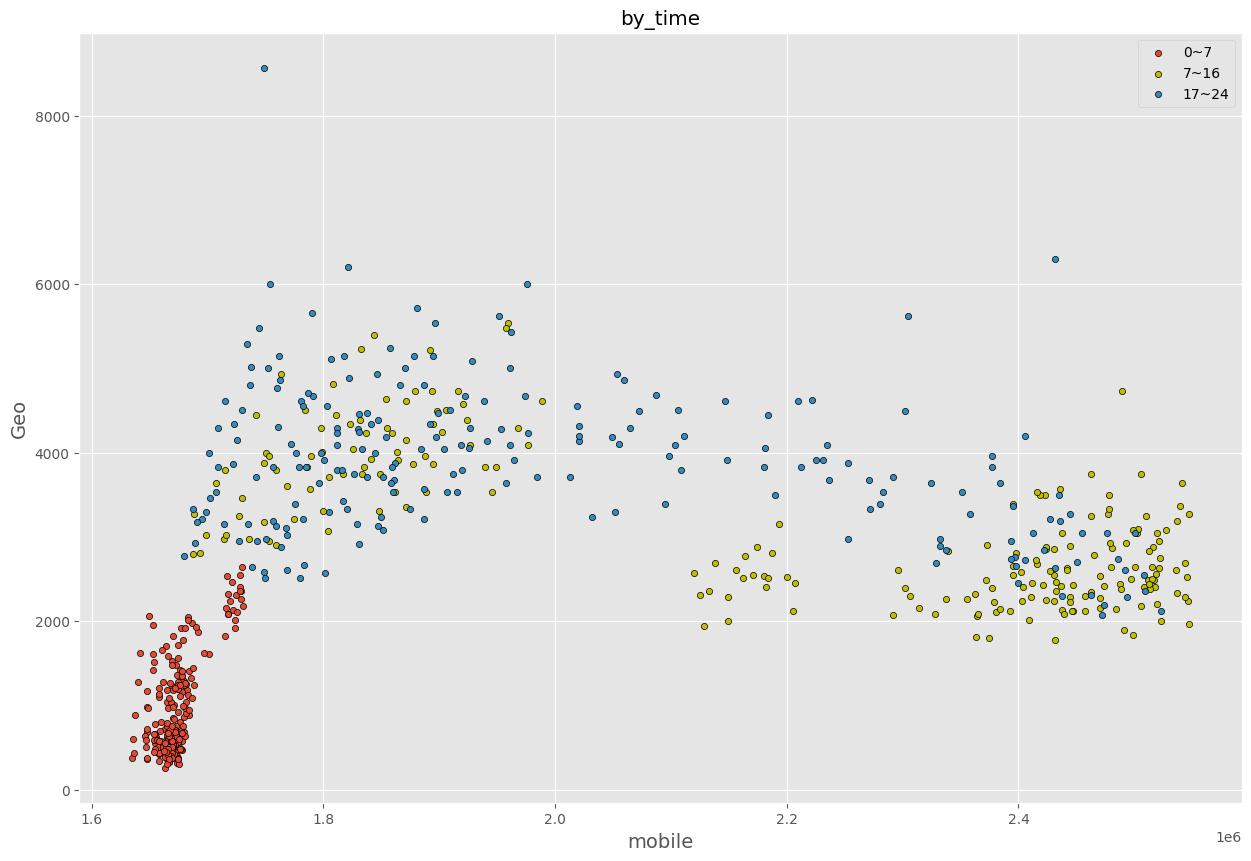

In [10]:
X = estimate_from_mobile_data_asa_flatten.reshape(-1,1)
y = estimate_month7_Geo_asa_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))

#plt.subplot(1, 3, 0 + 1)
plt.scatter(X[:, 0], y, edgecolor="black", s=20,label='0~7')


X = estimate_from_mobile_data_hiru_flatten.reshape(-1,1)
y = estimate_month7_Geo_hiru_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)


#plt.subplot(1, 3, 0 + 1)
plt.scatter(X[:, 0], y, edgecolor="black", s=20,c='y',label='7~16')


X = estimate_from_mobile_data_ban_flatten.reshape(-1,1)
y = estimate_month7_Geo_ban_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

#plt.subplot(1, 3, 0 + 1)
plt.scatter(X[:, 0], y, edgecolor="black", s=20,label="17~24")
plt.legend()
plt.title('by_time')
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)


Text(0, 0.5, 'Geo')

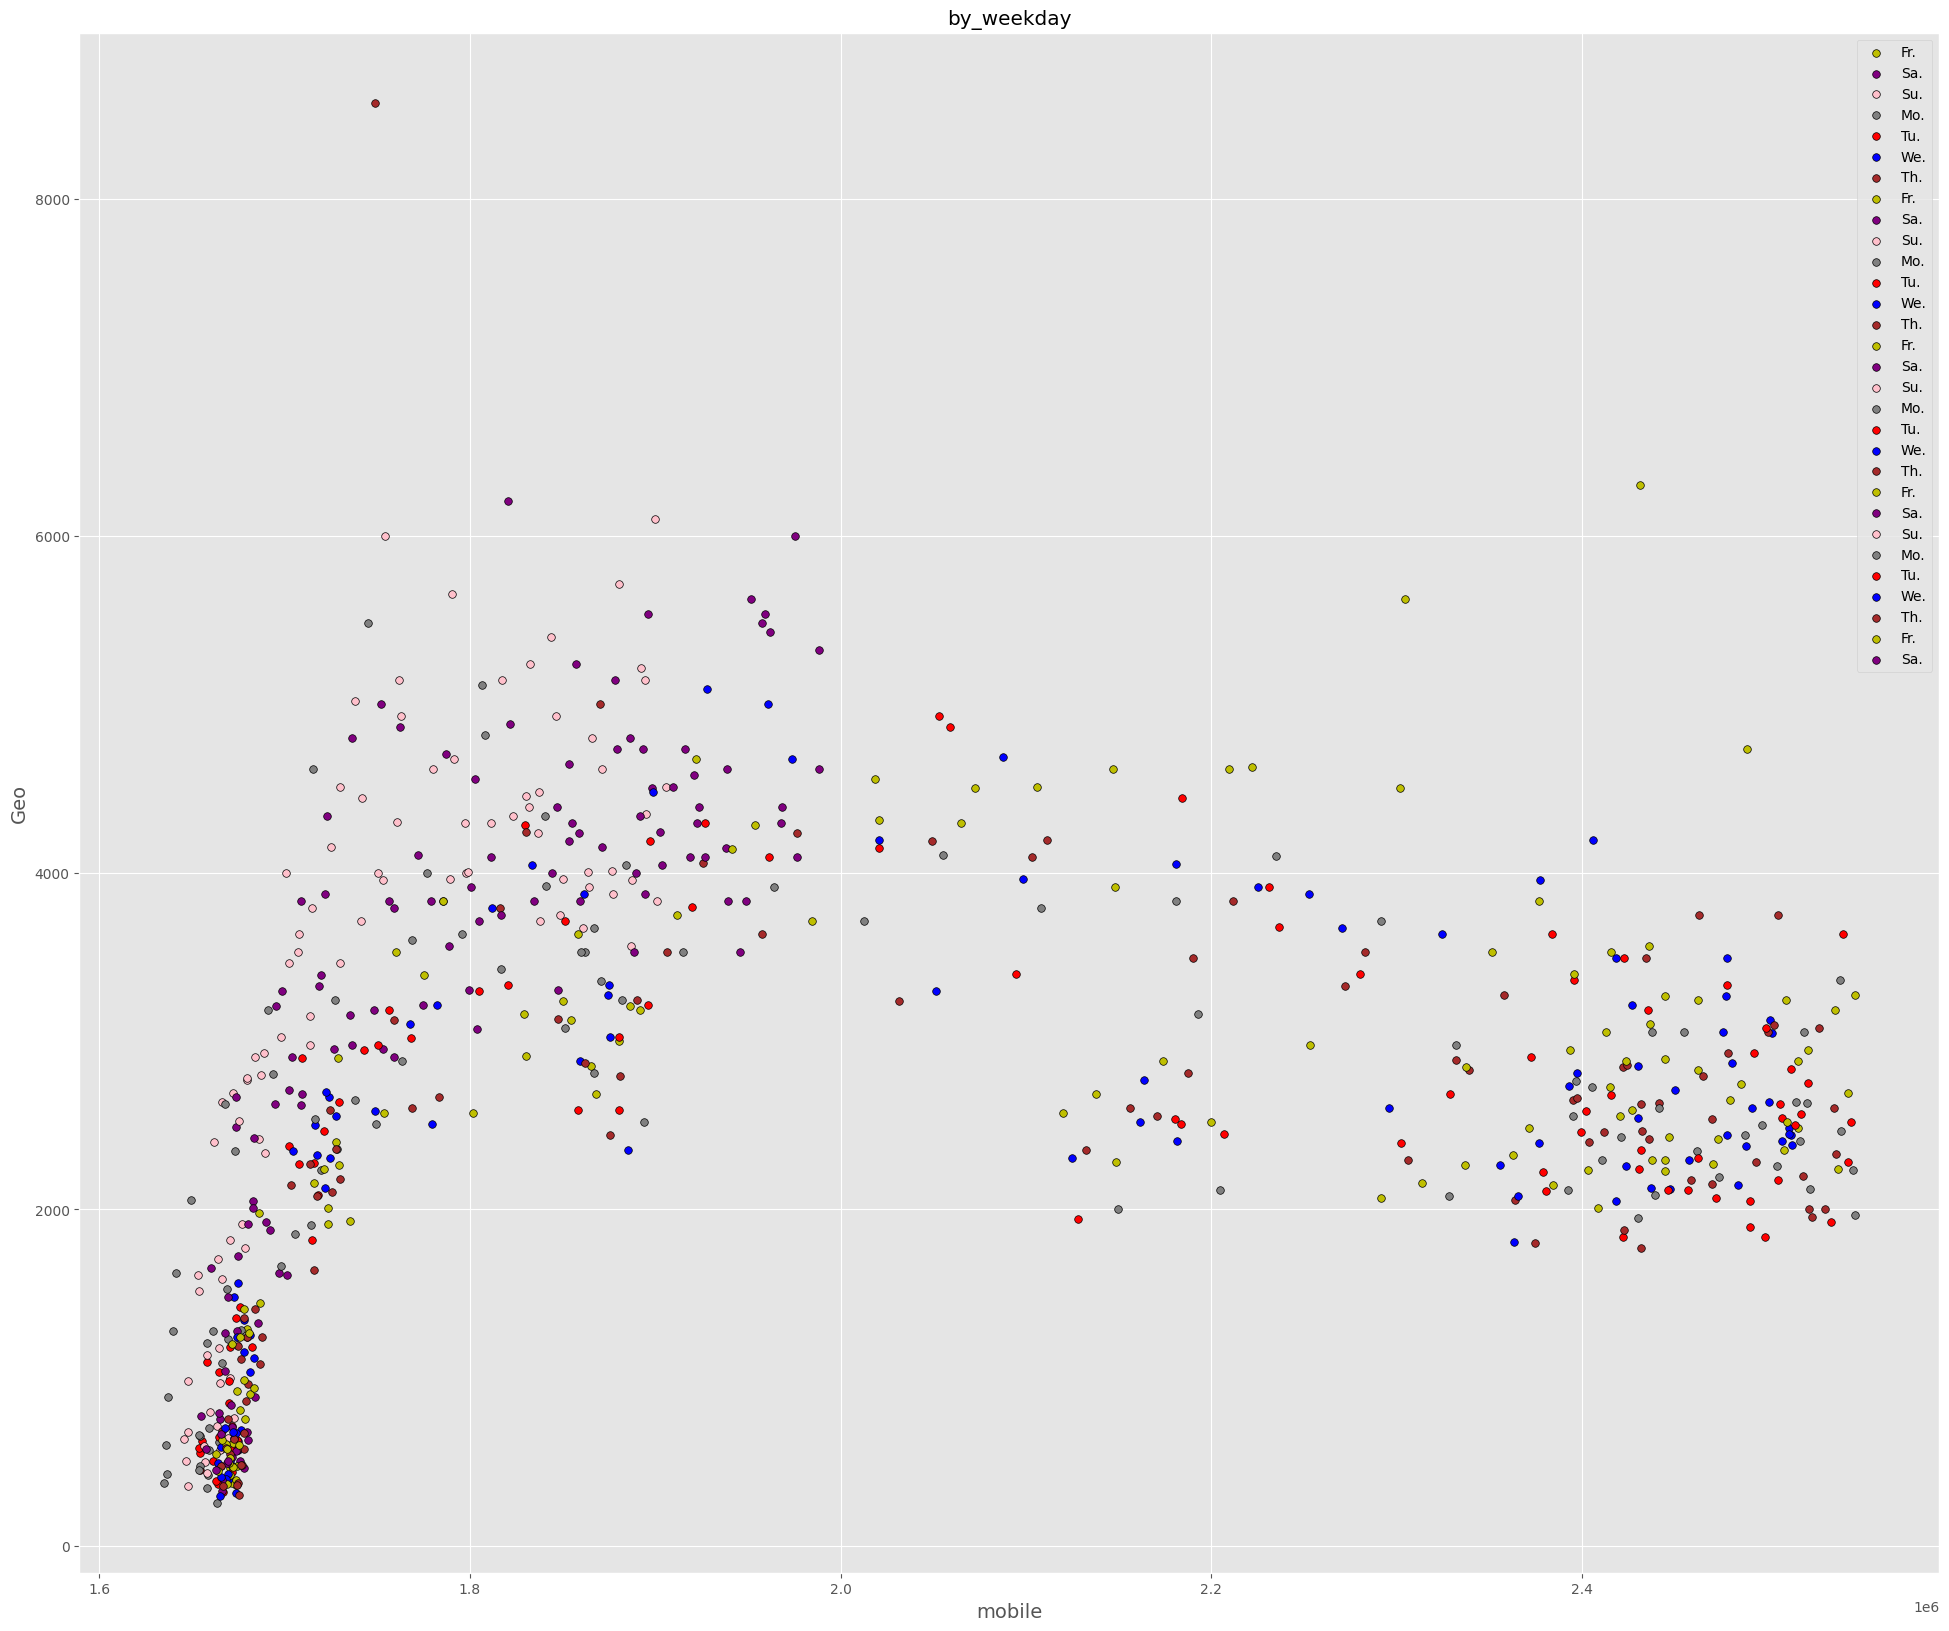

In [11]:
plt.figure(figsize=(24, 20))
for i in range(0,30):
    if (i%7==0):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='y',label='Fr.')
    if (i%7==1):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='purple',label='Sa.')
    if (i%7==2):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='pink',label='Su.')
    if (i%7==3):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='gray',label='Mo.')
    if (i%7==4):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='red',label='Tu.')
    if (i%7==5):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue',label='We.')
    if (i%7==6):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='brown',label='Th.')


plt.legend()
plt.title('by_weekday')
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)

Text(0, 0.5, 'Geo')

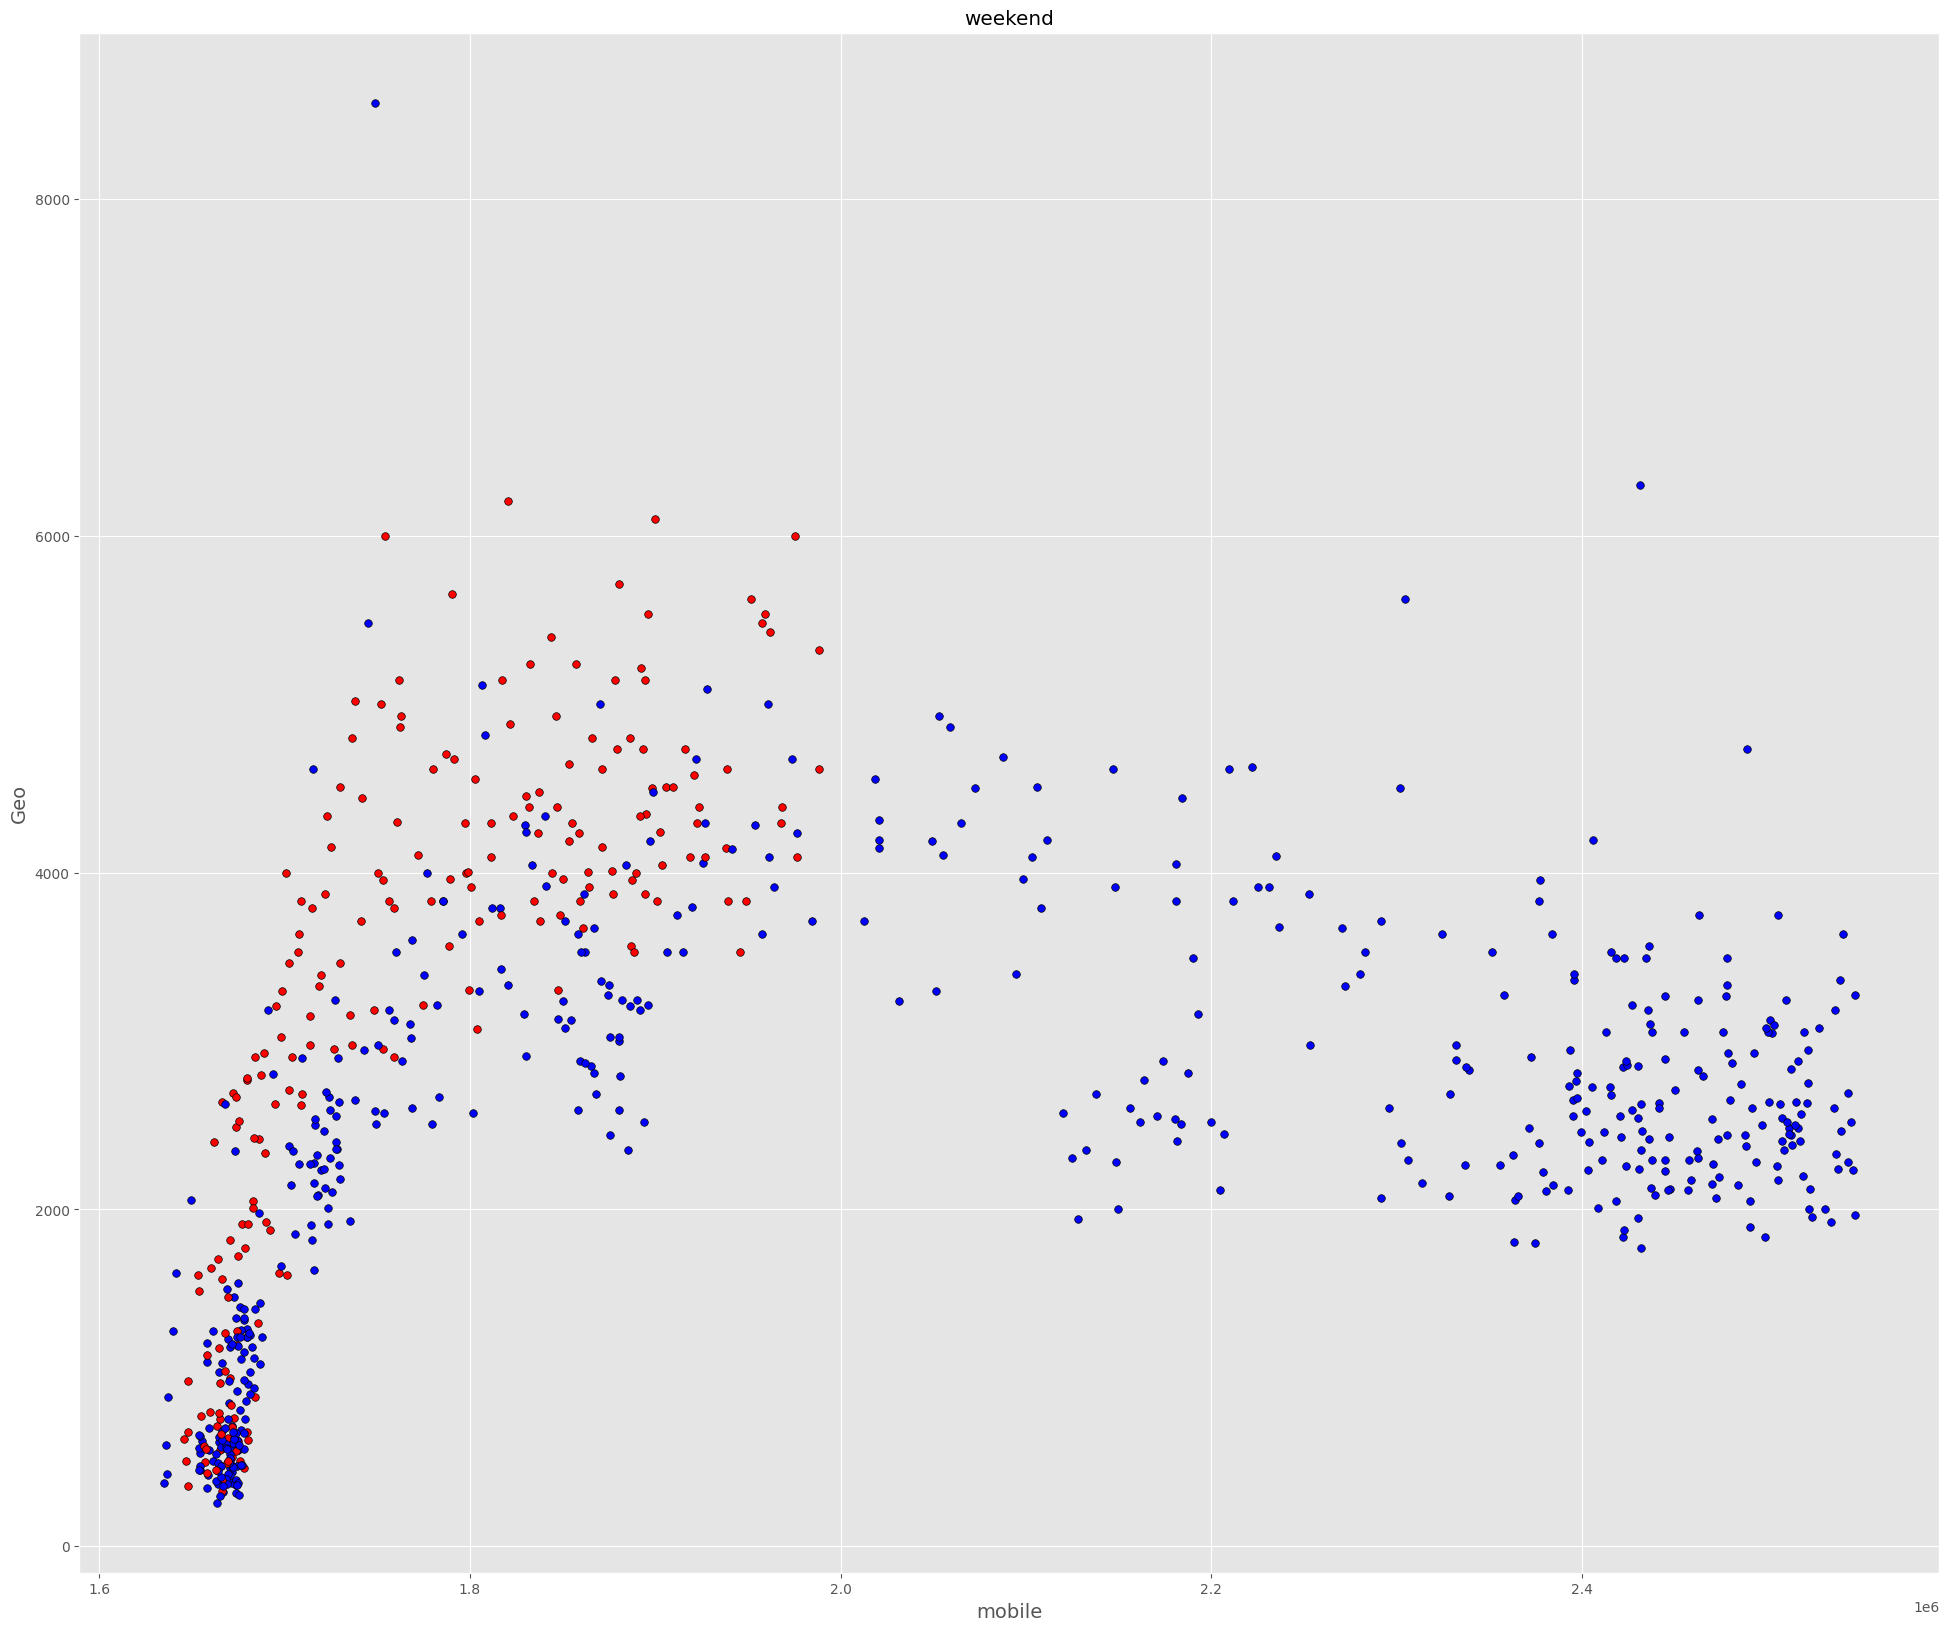

In [12]:
plt.figure(figsize=(24, 20))
for i in range(0,30):
    if (i%7==0):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue')
    if (i%7==1):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='red')
    if (i%7==2):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='red')
    if (i%7==3):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue')
    if (i%7==4):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue')
    if (i%7==5):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue')
    if (i%7==6):
        estimate_from_mobile_data_flatten = estimate_from_mobile_data[i,:].flatten()
        estimate_month7_Geo_flatten = estimate_month7_Geo[i,:].flatten()
        X = estimate_from_mobile_data_flatten.reshape(-1,1)
        y = estimate_month7_Geo_flatten.reshape(-1,1)
        plt.scatter(X[:, 0], y, edgecolor="black", s=30,c='blue')
plt.title('weekend')
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)

In [13]:
holiday_key_list = []
workday_key_list = []
for i in range(0,30):
    if (i%7==1):
        holiday_key_list.append(i)
    if (i%7==2):
        holiday_key_list.append(i)
    else:
        workday_key_list.append(i)


In [14]:
workday_mobile = np.delete(estimate_from_mobile_data, holiday_key_list, 0)
holiday_mobile = np.delete(estimate_from_mobile_data, workday_key_list, 0)


In [15]:
workday_geo = np.delete(estimate_month7_Geo, holiday_key_list, 0)
holiday_geo = np.delete(estimate_month7_Geo, workday_key_list, 0)

/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'F-test=193.24, MI=0.51')

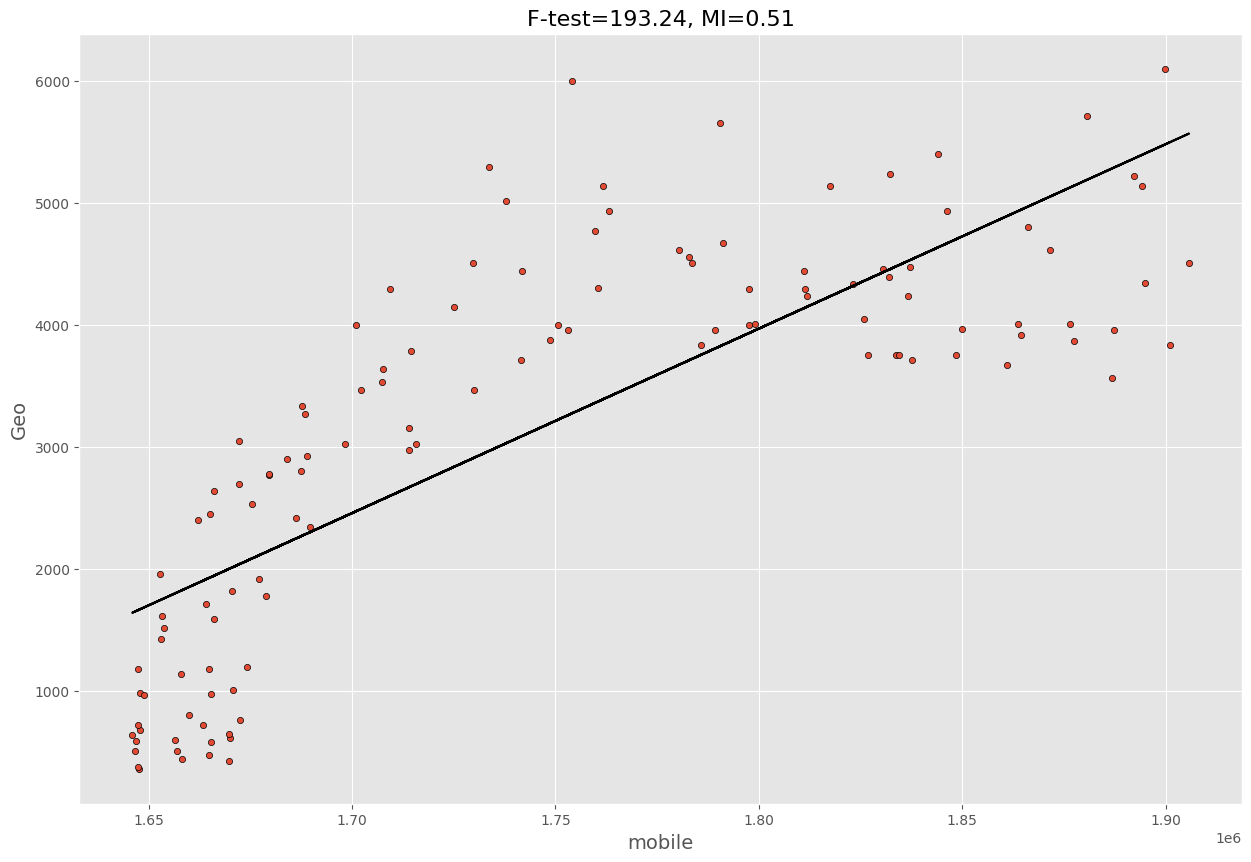

In [16]:
X = holiday_mobile.reshape(-1,1)
y = holiday_geo.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))

a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
y2 = a * X + b
plt.plot(X, y2,color='black')

#plt.subplot(1, 3, 0 + 1)
plt.scatter(X, y, edgecolor="black", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)

/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'F-test=82.15, MI=0.56')

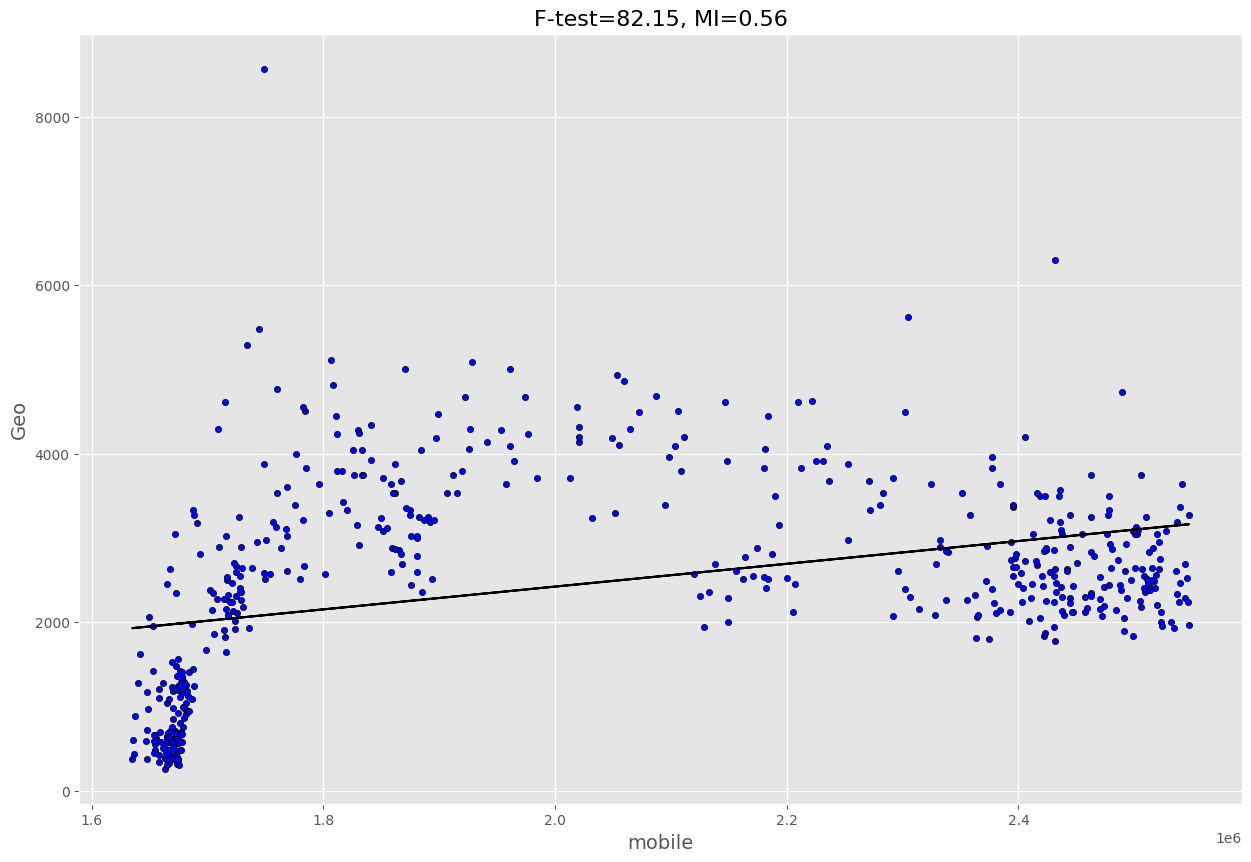

In [17]:
X = workday_mobile.reshape(-1,1)
y = workday_geo.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
y2 = a * X + b
plt.plot(X, y2,color='black')

#plt.subplot(1, 3, 0 + 1)
plt.scatter(X, y, edgecolor="black", s=20,c='blue')
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)

/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/miniconda3/envs/person_move/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'F-test=48.93, MI=0.27')

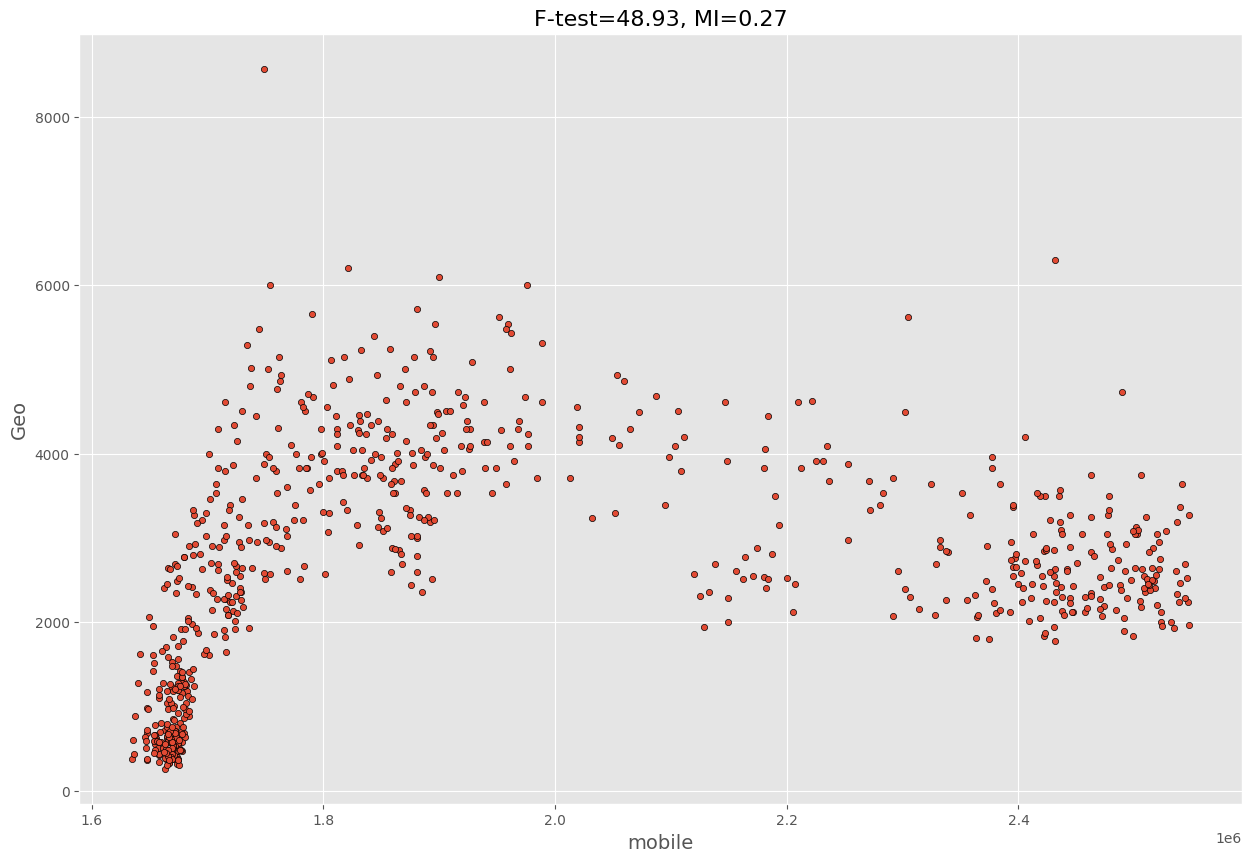

In [18]:


estimate_from_mobile_data_flatten = estimate_from_mobile_data.flatten()
estimate_month7_Geo_flatten = estimate_month7_Geo.flatten()
X = estimate_from_mobile_data_flatten.reshape(-1,1)
y = estimate_month7_Geo_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))

#plt.subplot(1, 3, 0 + 1)
plt.scatter(X[:, 0], y, edgecolor="black", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)